# Basic Concept of Random Variables

Before using the Z-Distribution into the financial data, we must know the basic knowledge of random variables first. I will use the rolling dice example for this.

In [103]:
# Import packages

import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Create the dice vector as simulation, rolling 2 dices

dice = pd.DataFrame([1, 2, 3, 4, 5, 6])
dice_sum = dice.sample(n = 2, replace = True).sum().iloc[0]

print("Sum of Dice is: " + str(dice_sum))

Sum of Dice is: 8


In [29]:
# Create the dice vector as simulation, rolling 3 dices

dice_sum_3 = dice.sample(n = 3, replace = True).sum().iloc[0]
print("Sum of 3 times rolling dice is: " + str(dice_sum_3))

Sum of 3 times rolling dice is: 8


In [39]:
# Mimicing the rolling dice with many trials

trials = 50
dice_trials = [dice.sample(n = 2, replace = True).sum().iloc[0] for i in range(trials)]

print(dice_trials[0:10])

[2, 11, 8, 4, 10, 2, 11, 5, 6, 5]


# Basic Concept of Frequency and Distribution

Now, let's talk about the basic concept of frequency and distribution.

In [48]:
# Create a frequency table for rolling dice with 50 trials

freq = pd.DataFrame(dice_trials)[0].value_counts()
sort_freq = freq.sort_index()

sort_freq

TypeError: 'Series' object is not callable

<AxesSubplot:>

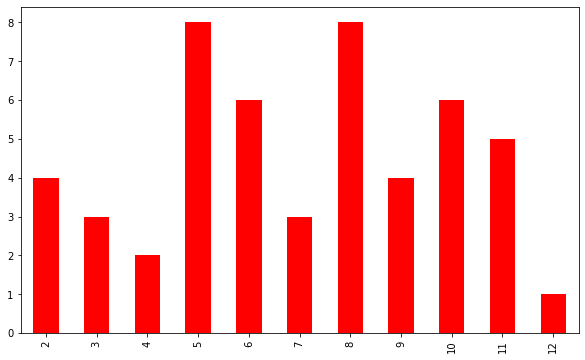

In [52]:
# Plot the frequency in the bar plot

sort_freq.plot(kind = 'bar', color = 'red', figsize = (10, 6))

<AxesSubplot:>

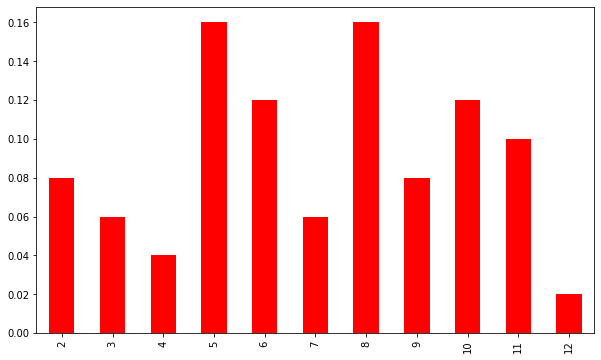

In [61]:
# Calculate relative frequency so we can compare to other number of trials
# Formula = How often something happens divided by all outcomes

relative_freq = sort_freq / trials
relative_freq.plot(kind = 'bar', color = 'red', figsize = (10, 6))

<AxesSubplot:>

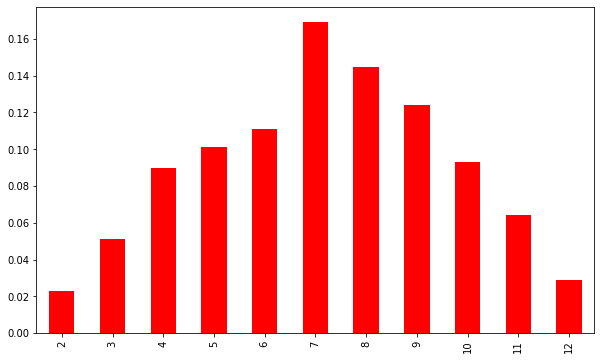

In [69]:
# The bigger number of trials/sample, the distribution will be more bell-shaped

trials2 = 1000
dice_trials2 = [dice.sample(n = 2, replace = True).sum().iloc[0] for i in range(trials2)]

freq2 = pd.DataFrame(dice_trials2)[0].value_counts()
sort_freq2 = freq2.sort_index()

relative_freq2 = sort_freq2 / trials2
relative_freq2.plot(kind = 'bar', color = 'red', figsize = (10, 6))

# With more trials, the result looks more and more stable, and this is very close to a probability distribution

In [70]:
# Now for the concept of Expectation and Variance of a distribution
# Let's calculate all of the probability of the sum of dice

X_dist = pd.DataFrame(index = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_dist['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_dist['Prob'] = X_dist['Prob'] / 36

X_dist

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [77]:
# Mean and variance of probability could explain a distribution
# This is a case where the probability shapes a normal distribution

mean = pd.Series(X_dist.index * X_dist['Prob']).sum()
var = pd.Series(((X_dist.index - mean) ** 2) * X_dist['Prob']).sum()

print('Mean: ' + str(mean))
print('Variance: ' + str(var))

Mean: 6.999999999999998
Variance: 5.833333333333333


In [86]:
# Now, let's prove that using empirical evidence
# Let's use a bigger sample with 5000 trials

trials3 = 20000
dice_trials3 = [dice.sample(n = 2, replace = True).sum().iloc[0] for i in range(trials3)]

freq3 = pd.DataFrame(dice_trials3)[0].value_counts()
sort_freq3 = freq3.sort_index()

In [91]:
# Print the mean
# It will be close to 7.00 for mean, and 5.83 for variance

result = pd.Series(dice_trials3)
print(result.mean(), result.var())

7.01505 5.829314963248162


<AxesSubplot:>

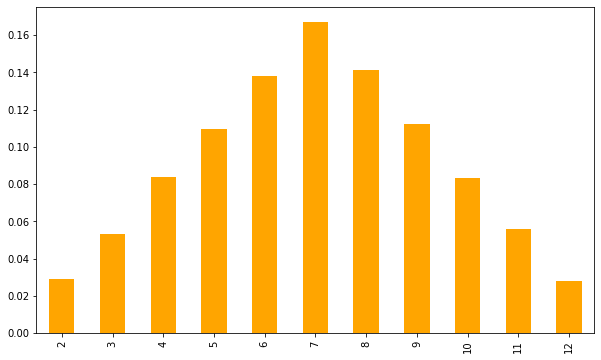

In [97]:
# Let's plot it to the distribution frequency

relative_freq3 = sort_freq3 / trials3
relative_freq3.plot(kind = 'bar', color = 'orange', figsize = (10, 6))

# Modeling the Return of the Stock

After understanding the model, we can now model the probability of stock return using z-distribution. I wil use the Facebook stock price from 2015 - 2018 as an example.

In [111]:
df_fb = pd.read_csv('data/facebook.csv', index_col = 0)
df_fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [118]:
# Now, I will calculating the daily return in logarithmic scale
# There are 2 reasons why I want to use logarithmic scale
# 1) When large values skew the graph of the data
# 2) To show multiplicative factors or percent changes

df_fb['LogDR'] = np.log(df_fb['Close'].shift(-1)) - np.log(df_fb['Close'])
df_fb

,Open,High,Low,Close,Adj Close,Volume,LogDR
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.003982
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.017034
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.030787
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.002609
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.036927
...,...,...,...,...,...,...,...
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,0.012610
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,-0.021798
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,-0.029452


In [124]:
mu = df_fb['LogDR'].mean()
sigma = df_fb['LogDR'].std(ddof=1)

# Create density line plot 
# np.arange to return evenly spaced values within a given interval

density = pd.DataFrame()
density['x'] = np.arange(df_fb['LogDR'].min() - 0.01, df_fb['LogDR'].max() + 0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

density

,x,pdf
0,-0.107308,9.825282e-04
1,-0.106308,1.170300e-03
2,-0.105308,1.391739e-03
3,-0.104308,1.652446e-03
4,-0.103308,1.958867e-03
...,...,...
374,0.266692,1.476754e-23
375,0.267692,9.697482e-24
376,0.268692,6.357969e-24
377,0.269692,4.161849e-24


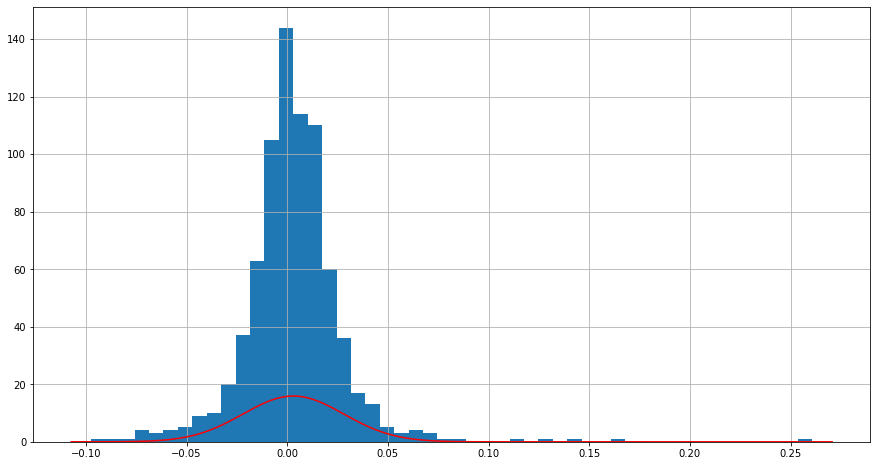

In [129]:
# Plot histogram of Log Daily Return and Probability Density Function on the same plot
# I assume that the values are discrete, from min. to max. stock price

df_fb['LogDR'].hist(bins = 50, figsize = (15, 8))
plt.plot(density['x'], density['pdf'], color = 'red')
plt.show()

In [167]:
# Calculate the probability that the stock will drop over 10% in a day
# We can change the percentage by changing the confidence interval parameter
# The norm.cdf calculate the area in the left

prob_return1 = norm.cdf(-0.01, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.3014549901920741


In [149]:
# Drop over 40% in 252 days (a full year)

mu252 = 252 * mu
sigma252 = (252**0.5) * sigma
print('The probability of dropping over 40% in 252 days is (a full year) ', norm.cdf(-0.40, mu252, sigma252))

The probability of dropping over 40% in 252 days is (a full year)  0.0016974230735661068


## Calculating the VaR (Value at Risk)

Value at Risk is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time.

In [170]:
# We can calculate the VaR like using ppf
# norm.ppf calculate area to the right (one-tail test)

VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk', VaR)

# How to interpret?
# At a single day, with 95% confidence, we do not expect to lose more than 3%

Single day value at risk -0.038185354350792663


In [171]:
# Set using other parameters

# 5% quantile
q5 = norm.ppf(0.05, mu, sigma)
print('5% quantile ', q5)
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)
# 95% quantile
q95 = norm.ppf(0.95, mu, sigma)
print('95% quantile ', q95)

5% quantile  -0.038185354350792663
25% quantile  -0.013866270900421623
75% quantile  0.019941608626761715
95% quantile  0.04426069207713273
